In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

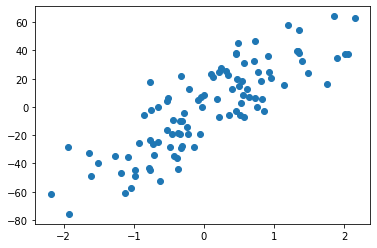

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)
r2_score(y,y_pred)

0.7035182396294911

In [19]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=0)
rd.fit(X,y)
y_pred=rd.predict(X)
print(r2_score(y,y_pred))
print(rd.coef_)
print(rd.intercept_)

0.7035182396294912
[27.82809103]
-2.2947445586769795


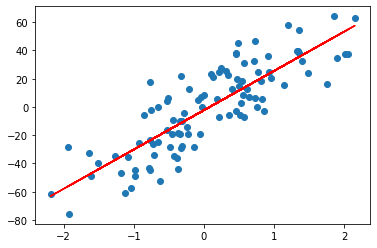

In [34]:
plt.scatter(X,y)
plt.plot(X,rd.predict(X),color='red')

In [11]:
rd1 = Ridge(alpha=10)
rd1.fit(X,y)
y_pred=rd1.predict(X)
r2_score(y,y_pred)

0.6960172225909291

In [12]:
rd2 = Ridge(alpha=100)
rd2.fit(X,y)
y_pred=rd2.predict(X)
r2_score(y,y_pred)

0.5020011026155695

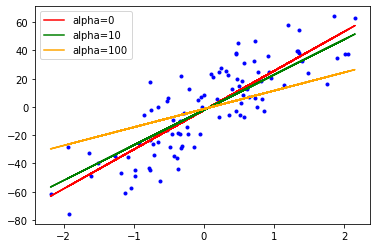

In [13]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rd1.predict(X),color='green',label='alpha=10')
plt.plot(X,rd2.predict(X),color='orange',label='alpha=100')
plt.legend()

## Chalo Apna Banate hain....

In [14]:
class SRD:
    def __init__(self,alpha):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num = num + (y_train[i]-y_train.mean()) * (X_train[i]-X_train.mean())
            den = den + (X_train[i]-X_train.mean()) * (X_train[i]-X_train.mean())
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m,self.b)
    def predict(self,X_test):
        return self.m*X_test + self.b
        

In [15]:
my_srd = SRD(alpha=0)

In [25]:
my_srd.fit(X,y)

[27.82809103] [-2.29474456]


In [26]:
y_pred=my_srd.predict(X)

In [27]:
r2_score(y,y_pred)

0.7035182396294912

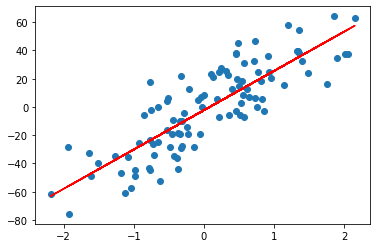

In [31]:
plt.scatter(X,y)
plt.plot(X,my_srd.predict(X),color='red')